# Random Forest

### Dataset Description:

#### Use the Glass dataset and apply the Random forest model.

#### 1. Exploratory Data Analysis (EDA):
#### Perform exploratory data analysis to understand the structure of the dataset.
#### Check for missing values, outliers, inconsistencies in the data.

In [1]:
import pandas as pd

df = pd.read_csv("glass1.csv")

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


(None,
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
 0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
 1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
 2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
 3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
 4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0)

In [2]:
missing_values = df.isnull().sum()

summary_statistics = df.describe()

missing_values, summary_statistics

(RI      785
 Na      785
 Mg      785
 Al      785
 Si      785
 K       785
 Ca      785
 Ba      785
 Fe      785
 Type    785
 dtype: int64,
                RI          Na          Mg          Al          Si           K  \
 count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
 mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
 std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
 min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
 25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
 50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
 75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
 max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   
 
                Ca          Ba          Fe        Type  
 count  214.000000  214.000000  214.000000  214.000000  
 

#### 2: Data Visualization:
#### Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#### Analyze any patterns or correlations observed in the data.

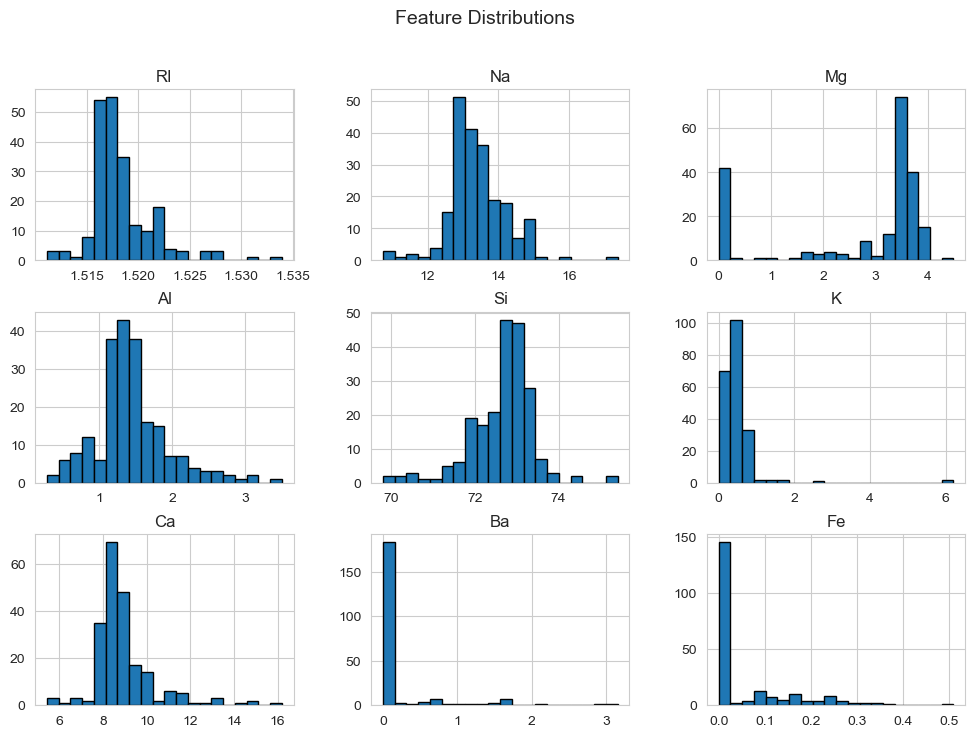

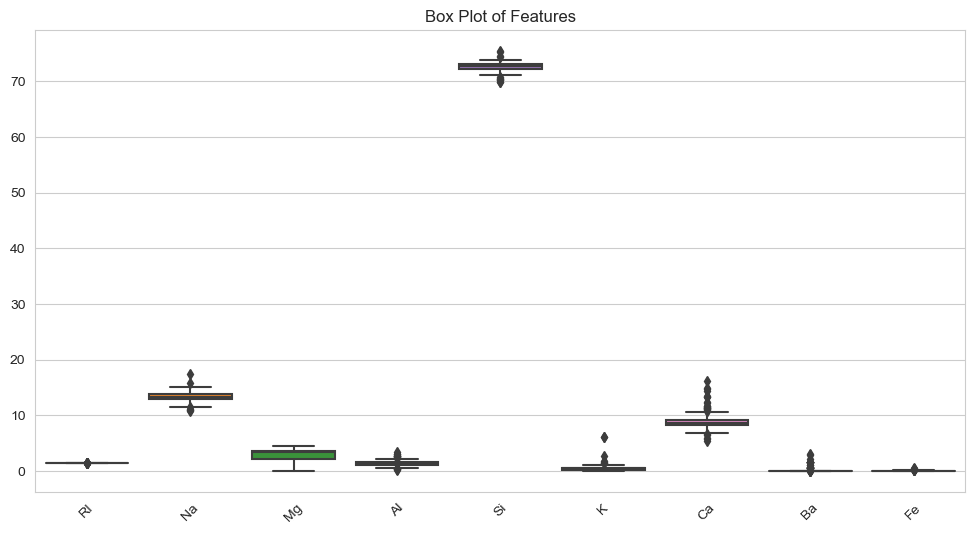

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df.drop(columns=["Type"]).hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Type"]))
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

#### 3: Data Preprocessing

#### 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
#### 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
#### 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [5]:
df_imputed = df.fillna(df.mean())

# Verify if missing values are handled
missing_values_after = df_imputed.isnull().sum()
missing_values_after

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

label_encoder = LabelEncoder()
df_imputed["Type"] = label_encoder.fit_transform(df_imputed["Type"])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed.drop(columns=["Type"]))

df_scaled = pd.DataFrame(scaled_features, columns=df_imputed.drop(columns=["Type"]).columns)
df_scaled["Type"] = df_imputed["Type"]  

class_distribution = Counter(df_scaled["Type"])

df_scaled.head(), class_distribution

(         RI        Na        Mg        Al        Si         K        Ca  \
 0  1.885924  0.615672  2.710781 -1.496095 -2.435182 -1.451292 -0.314944   
 1 -0.538712  1.278685  1.374509 -0.368298  0.221071 -0.056637 -1.714947   
 2 -1.558485  0.323947  1.299438  0.412485  0.948046 -0.355491 -1.791034   
 3 -0.503055 -0.524709  1.509638 -0.671935 -0.114455  0.242218 -1.121467   
 4 -0.674206 -0.365586  1.404538 -0.888820  1.199691  0.175806 -1.349729   
 
          Ba       Fe  Type  
 0 -0.762428 -1.26709     0  
 1 -0.762428 -1.26709     0  
 2 -0.762428 -1.26709     0  
 3 -0.762428 -1.26709     0  
 4 -0.762428 -1.26709     0  ,
 Counter({2: 785, 1: 76, 0: 70, 6: 29, 3: 17, 4: 13, 5: 9}))

#### 4: Random Forest Model Implementation
#### 1. Divide the data into train and test split.
#### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
#### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_scaled.drop(columns=["Type"])  
y = df_scaled["Type"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.80      0.92      0.86        13
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6

    accuracy                           0.98       200
   macro avg       0.96      0.90      0.92       200
weighted avg       0.98      0.98      0.98       200



In [8]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

bagging_model = BaggingClassifier(RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Bagging (Random Forest) Accuracy:", accuracy_score(y_test, bagging_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Bagging (Random Forest) Accuracy: 0.97
AdaBoost Accuracy: 0.915
Gradient Boosting Accuracy: 0.95
XGBoost Accuracy: 0.965


### Bagging -
#### Trains multiple models in parallel on random subsets of data.
#### Reduces variance and prevents overfitting.
#### Example: BaggingClassifier, RandomForestClassifier.

### Boosting –
#### Trains models sequentially, where each model corrects the mistakes of the previous one.
#### Reduces bias and improves weak models.
#### Example: AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier.

## 1. Explain Bagging and Boosting methods. How is it different from each other.

### Definition:
#### Bagging is an ensemble method that trains multiple models in parallel on random subsets of data and then combines their predictions.

### How It Works:
#### Bootstrap Sampling: Creates multiple subsets of the original dataset by randomly selecting samples with replacement.
#### Parallel Training: Trains independent models (e.g., Decision Trees, Random Forest) on different subsets.
#### Aggregation: Combines predictions using majority voting (for classification) or averaging (for regression).

### Advantages of Bagging:
#### Reduces variance, preventing overfitting.
#### Works well with high-dimensional datasets.
#### Can be used with complex models like Random Forest.

### Example Algorithm: Random Forest
#### A Random Forest is an extension of bagging that trains multiple Decision Trees and averages their results.


### Definition:
#### Boosting is an ensemble method that trains models sequentially, where each model corrects the mistakes of the previous one.

### How It Works:
#### Sequential Learning: The first model makes predictions, and misclassified samples are given higher weights.
#### Weak Learners: Each new model focuses more on the misclassified samples from previous models.
#### Final Prediction: All models contribute to the final prediction, usually with weighted voting.

### Advantages of Boosting:
#### Reduces bias, improving weak models.
#### Often achieves higher accuracy than bagging.
#### Works well with smaller datasets.

### Example Algorithms:
#### AdaBoost (Adaptive Boosting): Adjusts sample weights to focus on hard-to-classify points.
#### Gradient Boosting: Optimizes errors using gradient descent.
#### XGBoost: An advanced, faster version of Gradient Boosting.


## 2. Explain how to handle imbalance in the data.

#### Imbalanced data occurs when one class has significantly fewer instances than another, which can lead to biased models. For example, in fraud detection, fraudulent transactions may be only 1% of the total data.

### Strategies to Handle Imbalanced Data
### 1.Resampling Techniques
#### These methods adjust the dataset to balance class distributions.

### (a) Oversampling (Adding More Minority Class Samples)
#### Random Oversampling: Duplicates existing minority class samples.
#### SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic minority class samples based on feature similarity.
    
### (b) Undersampling (Removing Majority Class Samples)
#### Random Undersampling: Removes random samples from the majority class.
#### NearMiss: Selects majority class samples that are closest to minority class samples.

### 2.Cost-Sensitive Learning (Adjusting Model Weights)
#### Instead of changing the dataset, we modify the model to penalize misclassifications of the minority class.

### 3.Anomaly Detection (When Minority Class is Extremely Small)
#### Instead of treating it as a classification problem, use anomaly detection techniques (like Isolation Forest, One-Class SVM).
#### Useful for fraud detection, rare disease identification, etc.